<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Feature Selection, Model Selection and Tuning</center></font></h1>
<h1><center>Credit Card Users Churn Prediction</center></h1>
<h3><center>Charlcye Mitchell, January 2023</center></h3>

#Problem Definition

##Context
The Thera bank recently saw a steep decline in the number of users of their credit card. Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and **identify the customers who will leave their credit card services as well as the reasons why** – so the bank can improve upon those areas.

You (a data scientist at Thera bank) need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

You need to identify the best possible model that will give the required performance.

##Objective
1.   Explore and visualize the dataset.
2.   Build a classification model to predict if the customer is going to churn or not
3.   Optimize the model using appropriate techniques
4.   Generate a set of insights and recommendations that will help the bank

##Data Dictionary

*   **CLIENTNUM**: Client number. Unique identifier for the customer holding the account
*   **Attrition_Flag** *(Target Class)*: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
*   **Customer_Age**: Age in Years
*   **Gender**: Gender of the account holder
*   **Dependent_count**: Number of dependents
*   **Education_Level**:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
*   **Marital_Status**: Marital Status of the account holder
*   **Income_Category**: Annual Income Category of the account holder
*   **Card_Category**: Type of Card
*   **Months_on_book**: Period of relationship with the bank
*   **Total_Relationship_Count**: Total no. of products held by the customer
*   **Months_Inactive_12_mon**: No. of months inactive in the last 12 months
*   **Contacts_Count_12_mon**: No. of Contacts between the customer and bank in the last 12 months
*   **Credit_Limit**: Credit Limit on the Credit Card
*   **Total_Revolving_Bal**: The balance that carries over from one month to the next is the revolving balance
*   **Avg_Open_To_Buy**: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
*   **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
*   **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
*   **Total_Ct_Chng_Q4_Q1**: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
*   **Total_Amt_Chng_Q4_Q1**: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
*   **Avg_Utilization_Ratio**: Represents how much of the available credit the customer spent

#Exploratory Data Analysis

###Importing the necessary packages

In [2]:
# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn import metrics

# library to build Linear Regression Model
from sklearn.linear_model import LogisticRegression

# library to encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# libraries to build ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier,
)

# libraries to build xgboost model
from xgboost import XGBClassifier

# library for stacking classifier
from sklearn.ensemble import StackingClassifier

# to tune different models
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

# to get diferent metric scores
from sklearn.metrics import (
    recall_score,
    confusion_matrix,
)

# for oversampling and undersampling data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# for missing value imputation
from sklearn.impute import SimpleImputer

###Define All Required Functions

In [ ]:
# histogram and boxplot for the feature
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot

# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    
# to plot confusion matrix
def draw_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# calculate different metric scores of the model - Accuracy, Recall, F1 and Precision
def get_metrics_score(model,flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store results
    score_list=[] 
    accuracy_list=[]
    precision_list=[]
    recall_list=[]
    f1_list=[]
    
    # predicting on train and tests
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)
    
    # accuracy of the model
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)
    test_acc = model.score(X_test,y_test)
    
    # recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    # precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    # f1_score of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    val_f1 = metrics.f1_score(y_val,pred_val)
    test_f1 = metrics.f1_score(y_test,pred_test)

    # populate the score_list 
    score_list.extend((train_acc,val_acc,test_acc,train_recall,val_recall,test_recall,train_precision,
                        val_precision,test_precision,train_f1,val_f1,test_f1))

    #list per data set
    accuracy_list.extend((train_acc,val_acc,test_acc))
    recall_list.extend((train_recall,val_recall,test_recall))
    precision_list.extend((train_precision,val_precision,test_precision))
    f1_list.extend((train_f1,val_f1,test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 

        print("Accuracy on training set : ",train_acc)
        print("Accuracy on validation set : ",val_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on validation set : ",val_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on validation set : ",val_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on validation set : ",val_f1)
        print("F1 on test set : ",test_f1)

    model_df = pd.DataFrame({"DataSet":["Training", "Validation", "Testing"], 
                                          "Accuracy": accuracy_list, "Recall": recall_list,
                                          "Precision": precision_list,"F1": f1_list}) 

    return model_df, score_list  # returning the list with train and test scores

###Reading the Datasets

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# read in the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners.csv')

In [ ]:
print(f"\nRows and Columns:\n{df.shape}")


Rows and Columns:
(10127, 21)


In [ ]:
print(f"\nColumn Names:\n{df.columns}")


Column Names:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [ ]:
# list of features that are int64, object, and float64
s = (df.dtypes == 'object')
cat_cols = list(s[s].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (df.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

s = (df.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")
del s

6 Categorical features:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

5 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

10 int features:
['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [ ]:
print(f"\nNull Values %:\n{df.apply(lambda x: sum(x.isnull()) / len(df))}")


Null Values %:
CLIENTNUM                   0.000000
Attrition_Flag              0.000000
Customer_Age                0.000000
Gender                      0.000000
Dependent_count             0.000000
Education_Level             0.149995
Marital_Status              0.073961
Income_Category             0.000000
Card_Category               0.000000
Months_on_book              0.000000
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      0.000000
Contacts_Count_12_mon       0.000000
Credit_Limit                0.000000
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             0.000000
Total_Amt_Chng_Q4_Q1        0.000000
Total_Trans_Amt             0.000000
Total_Trans_Ct              0.000000
Total_Ct_Chng_Q4_Q1         0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64


In [ ]:
# looking at head (5 observations) 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df[cat_cols].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,8608,9378,10127,10127
unique,2,2,6,3,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
#None of the numerical values seem suspicious. For most columns the mean is higher than the standard deviation, indicating right skewed data.
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
#This is our target class - we need to find out how to predict the "Attrited Customer" status.
df['Attrition_Flag'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Existing Customer    83.9%
Attrited Customer    16.1%
Name: Attrition_Flag, dtype: object

In [ ]:
df['Gender'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

F    52.9%
M    47.1%
Name: Gender, dtype: object

In [ ]:
df['Education_Level'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Graduate         36.3%
High School      23.4%
Uneducated       17.3%
College          11.8%
Post-Graduate     6.0%
Doctorate         5.2%
Name: Education_Level, dtype: object

In [ ]:
df['Marital_Status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Married     50.0%
Single      42.0%
Divorced     8.0%
Name: Marital_Status, dtype: object

In [ ]:
#We will consider Income_Category values of "abc" as missing values and impute them later.
df['Income_Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Less than $40K    35.2%
$40K - $60K       17.7%
$80K - $120K      15.2%
$60K - $80K       13.8%
abc               11.0%
$120K +            7.2%
Name: Income_Category, dtype: object

In [ ]:
df['Card_Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Blue        93.2%
Silver       5.5%
Gold         1.1%
Platinum     0.2%
Name: Card_Category, dtype: object

##Univariate Analysis

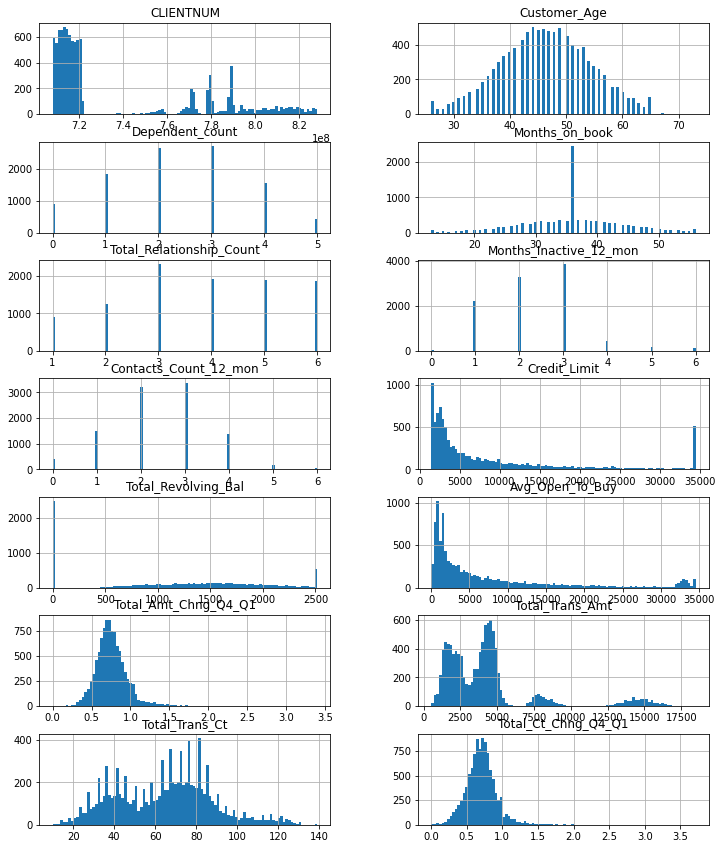

In [ ]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

##Bivariate Analysis

Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

In [ ]:
df.corr() # It will show correlation matrix 

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [ ]:
sns.pairplot(df, diag_kind="kde")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

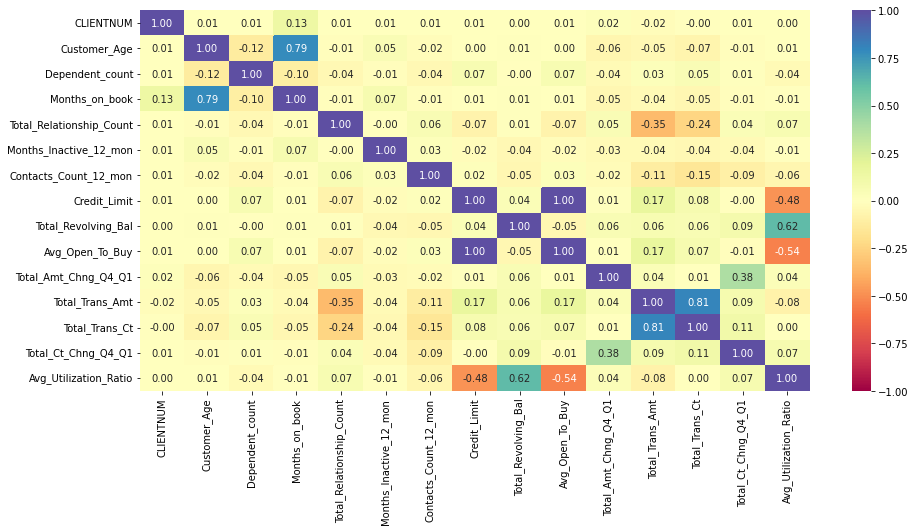

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

##Key meaningful observations on individual variables and the relationship between variables

The following columns are strongly correlated:
book_months and age
buy and credit limit
trans_count and trans_amt
util and rev_bal

There are also two derived features:
buy = credit_limit - rev_bal
util = rev_bal / credit_limit

We could reduce training time by removing irrelevant features:
Drop credit_limit & rev_bal as they are significantly correlated to and derived from the buy and util columns.
Drop the age column because of its high correlation with book_months
Drop the trans_count column because of its high correlation with trans_amt column

#Data pre-processing

##Prepare the data for analysis 

In [ ]:
#Remove CLIENTNUM. It is not a feature.
df.drop(df.columns[0], axis=1, inplace=True)

##Feature Engineering 

###Change Objects to Numerical

In [ ]:
#Change target class attrition flag to existing = 0, attrited = 1
#df['Attrition_Flag'] = df['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1])

In [ ]:
#df['Gender'] = df['Gender'].replace(['F','M'],[1,0])

In [ ]:
#df['Education_Level'] = df['Education_Level'].replace(['Uneducated','High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],[0,1,2,3,4,5])

In [ ]:
#df['Marital_Status'] = df['Marital_Status'].replace(['Single','Married', 'Divorced'],[0,1,2])

In [ ]:
#Change Income_Category to numerical
#df['Income_Category'] = df['Income_Category'].replace(['Less than $40K','$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'abc'],[0,1,2,3,4,5])

In [ ]:
#df['Card_Category'] = df['Card_Category'].replace(['Blue','Silver', 'Gold', 'Platinum'],[0,1,2,3])

##Missing value Treatment 

###Impute Missing Values

In [ ]:
#Impute missing values for Education Level
df['Education_Level'].fillna(value=df['Education_Level'].value_counts().index[0],inplace =True)

In [ ]:
# use simple imputer to impute the most_frequent values in categorical column
mar_imputer = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")
df.Marital_Status = mar_imputer.fit_transform(df["Marital_Status"].values.reshape(-1,1))[:,0]

In [ ]:
df["Marital_Status"].value_counts()

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
# treating error
ic_imputer = SimpleImputer(missing_values="abc", strategy="most_frequent")
df.Income_Category = ic_imputer.fit_transform(df["Income_Category"].values.reshape(-1,1))[:,0]

In [ ]:
df.Income_Category.value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

##Outlier Treatment 
**Note:** Please ensure no data leakage occurs among train-test and validation sets


❗Imputing and transformations should be done after split. 

The imputed data set depends on the sample.  The train data shouldn’t have access to the test data which could change impute values (ex impute median/mode/mean or minmaxscaler).


In [ ]:
# create numerical columns list
num_cols = df.select_dtypes(include=["int64", "float64"])

# create categorical columns list
cat_cols = df.select_dtypes(exclude=["int64", "float64"])

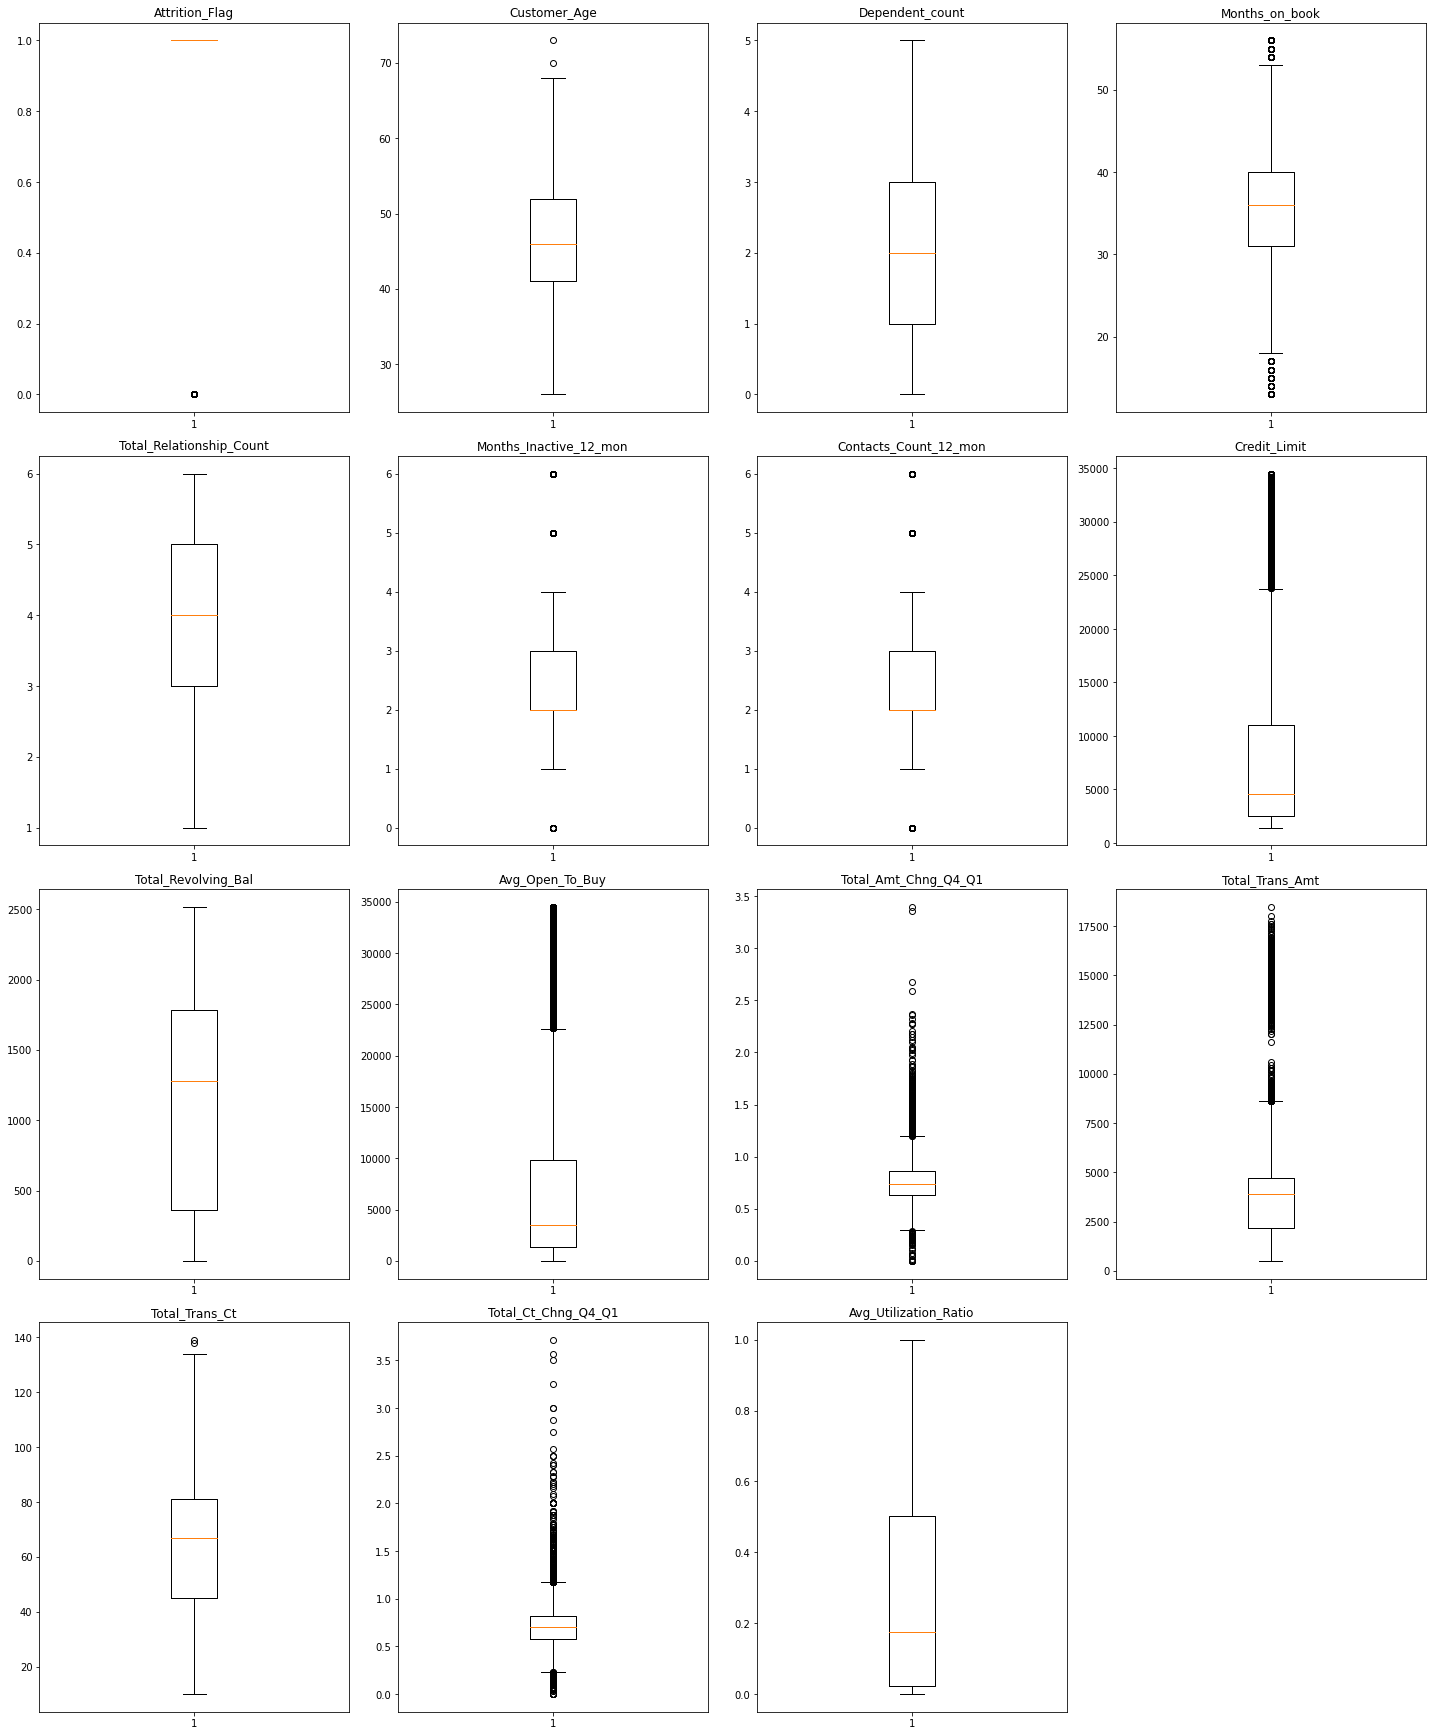

In [ ]:
# check the outliers before treating
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
#get the valuecounts
for i in cat_cols:
    print(df[i].value_counts())
    print("-"*50)
    print("\n")

F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------


Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------


Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------


Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
--------------------------------------------------




In [ ]:
# find the 25th percentile and 75th percentile
Q1 = df.quantile(0.25)            
Q3 = df.quantile(0.75)

# Inter Quantile Range (75th percentile - 25th percentile)
IQR = Q3 - Q1                           

# find lower and upper bounds for all values. All values outside these bounds are outliers.
lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((num_cols<lower)|(num_cols>upper)).sum()/len(df)*100

Attrition_Flag              16.065962
Customer_Age                 0.019749
Dependent_count              0.000000
Months_on_book               3.811593
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       3.268490
Contacts_Count_12_mon        6.211119
Credit_Limit                 9.716599
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              9.509233
Total_Amt_Chng_Q4_Q1         3.910339
Total_Trans_Amt              8.847635
Total_Trans_Ct               0.019749
Total_Ct_Chng_Q4_Q1          3.890590
Avg_Utilization_Ratio        0.000000
dtype: float64

There are outliers, but this is all valid business data and need not be corrected:

Credit_Limit, Contacts_Count_12_mon, Total_Trans_Ct and Avg_Open_To_Buy show heavy outliers.

Month_on_book, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1 and Months_Inactive_12_mon show few outliers.


#Model building

##Choose metric of interest 

#### Model can make wrong predictions as:
1. Predicting a customer will churn when they won't causes unnecessary investment of business resources
2. Failig to predict the customer will churn when they will costs the business customer acquisition costs and future revenue

#### Which case is more important? 
* We will accept over-identification of customers that will churn (FP) over missing any identification of customers that will churn (FN)

#### How to reduce False Negatives?
* We will maximize recall to prevent false negatives

In [ ]:
#Encode the target column so that Existing Customers = 1 and Attrited Customers = 0.
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# instantiate the LabelEncoder
encode_attr = LabelEncoder()

# fit the encoder
encode_attr.fit(df["Attrition_Flag"])

# encode the variable
df["Attrition_Flag"] = encode_attr.transform(df["Attrition_Flag"])

# verify the update
df.Attrition_Flag.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# Separating target variable and other variables
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [ ]:
X = pd.get_dummies(data=X, drop_first=True)

In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [ ]:
# use SMOTE - Synthetic Minority Over Sampling Technique to create oversampled training sets
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  

# fit the sampler and created undersampled data
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
# use randomundersampler for dataset processing
rus = RandomUnderSampler(random_state=1)

# fit the sampler and created undersampled data
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

##On Original Data

In [ ]:
 # Empty list to store all the models
models = [] 

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))

In [ ]:
# Empty list to store all model"s CV scores
results = []  

# best_scores
best_scores = []

# Empty list to store name of the models
names = []  

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance on Training Set:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    
    best_scores.append(round(cv_result.mean() * 100,2))

print("\n" "Training Set Performance:" "\n")

# fit and predict the models training set
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))

print("\n" "Validation Set Performance:" "\n")

# predict the models on validation set
for name, model in models:
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance on Training Set:

Logistic regression: 96.33269833939464
Bagging: 97.31355231003099
Random forest: 98.52925782678135
Gradient Boosting: 98.7841405453251
Adaboost: 97.92122226712078
Xgboost: 98.70568993053551
Decision tree: 96.37199099463143

Training Set Performance:

Logistic regression: 96.3326142380859
Bagging: 99.76465973720337
Random forest: 100.0
Gradient Boosting: 99.21553245734458
Adaboost: 98.25455971759169
Xgboost: 99.23514414591097
Decision tree: 100.0

Validation Set Performance:

Logistic regression: 96.52941176470588
Bagging: 97.94117647058823
Random forest: 98.47058823529412
Gradient Boosting: 98.88235294117646
Adaboost: 98.23529411764706
Xgboost: 98.88235294117646
Decision tree: 96.29411764705881


###Comparison

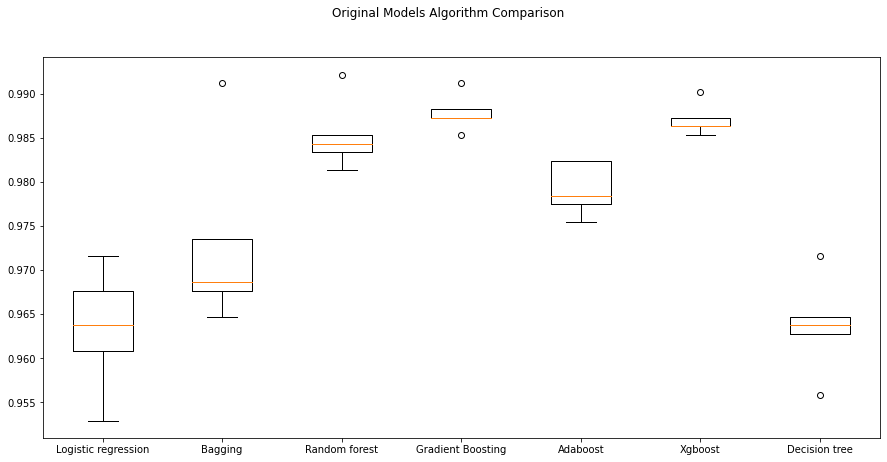

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Original Models Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

1. We see that Random Forest, Gradient Boosting, Adaboost, and XGBoost models are over fiting on the training set.
2. However the cross_validation has reduced the over fitting to some extent.
3. Random Forest, Gradient Boosting and XGBoost gives best perfomance and we would want to tune them for further improvements.
4. The boxplot shows that Gradient Boosting has 2 outliers and Random Forest and XGBoost have 1.

##On Oversampled Data

In [ ]:
# Empty list to store all model"s CV scores
results_over = []  

# best_scores
best_scores_over = []

# Empty list to store name of the models
names_over = []  

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance on Oversampled Training Set:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    
    best_scores_over.append(round(cv_result.mean() * 100,2))

print("\n" "Oversampled Training Performance:" "\n")

# fit and predict the models training set
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_over = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores_over))

print("\n" "Validation Set Performance:" "\n")

# predict the models on validation set
for name, model in models:
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance on Oversampled Training Set:

Logistic regression: 82.09478727703055
Bagging: 94.88152552483211
Random forest: 96.88183340068119
Gradient Boosting: 96.90153745502126
Adaboost: 96.01893436471742
Xgboost: 96.76420558409822
Decision tree: 94.21485885816544

Oversampled Training Performance:

Logistic regression: 83.21239458717396
Bagging: 99.52931947440675
Random forest: 100.0
Gradient Boosting: 97.60737399490095
Adaboost: 96.25416748382035
Xgboost: 97.35242204353794
Decision tree: 100.0

Validation Set Performance:

Logistic regression: 84.47058823529412
Bagging: 95.41176470588235
Random forest: 97.1764705882353
Gradient Boosting: 97.47058823529412
Adaboost: 95.35294117647058
Xgboost: 97.05882352941177
Decision tree: 94.76470588235294


###Comparison

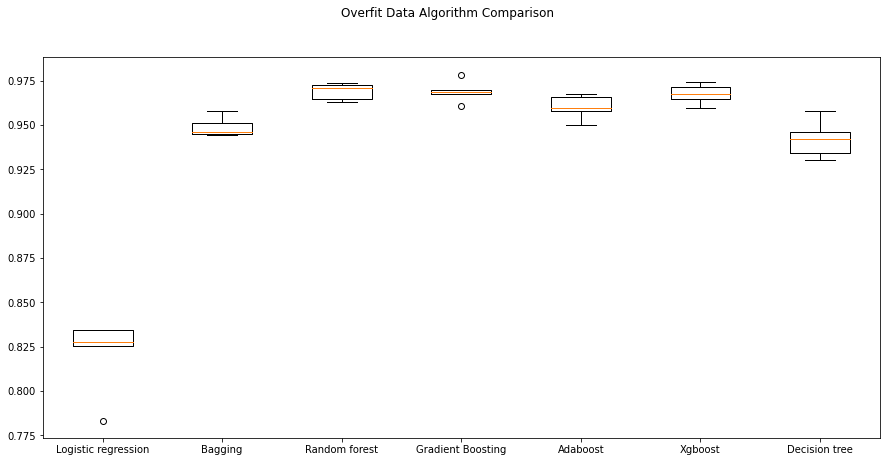

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Overfit Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

All models except logistic regression are overfit

##On Undersampled Data

In [ ]:
# Empty list to store all model"s CV scores
results_under = []  

# best scores
best_scores_under = []

# Empty list to store name of the models
names_under = []  

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance on Undersampled Training set:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scoring, cv=kfold
    )
    results_under.append(cv_result)
    names_under.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

    best_scores_under.append(round(cv_result.mean() * 100,2))

print("\n" "Undersampled Training Performance:" "\n")

# fit and predict the models training set
for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores_under = recall_score(y_train_under, model.predict(X_train_under)) * 100
    print("{}: {}".format(name, scores_under))

print("\n" "Validation Set Performance:" "\n")

# predict the models on validation set
for name, model in models:
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance on Undersampled Training set:

Logistic regression: 81.2480376766091
Bagging: 88.83150183150184
Random forest: 92.00680272108845
Gradient Boosting: 93.13448456305599
Adaboost: 90.98377812663527
Xgboost: 92.52066980638409
Decision tree: 88.42386185243328

Undersampled Training Performance:

Logistic regression: 78.5860655737705
Bagging: 99.59016393442623
Random forest: 100.0
Gradient Boosting: 97.23360655737704
Adaboost: 94.05737704918032
Xgboost: 96.00409836065575
Decision tree: 100.0

Validation Set Performance:

Logistic regression: 80.76470588235294
Bagging: 92.41176470588235
Random forest: 94.23529411764706
Gradient Boosting: 95.11764705882354
Adaboost: 92.23529411764706
Xgboost: 94.70588235294117
Decision tree: 91.11764705882352


###Comparison

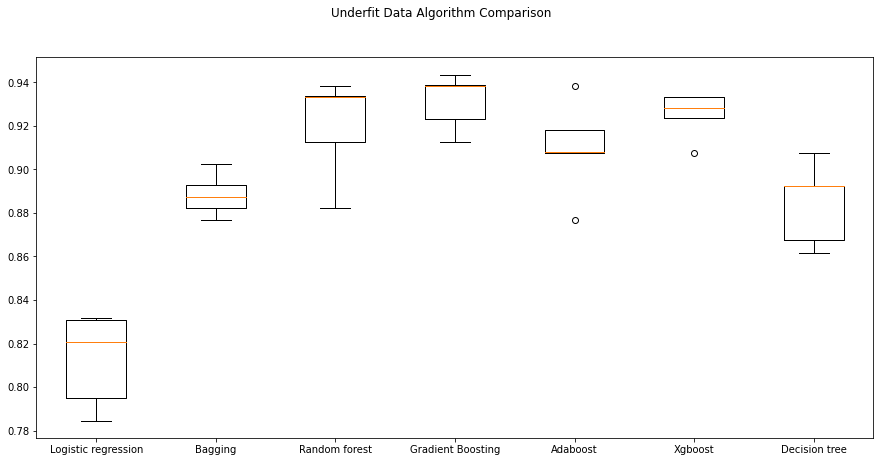

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Underfit Data Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_under)
ax.set_xticklabels(names_under)

plt.show()

##Compare Model Performance

In [ ]:
# create dataframe
comparison_frame = pd.DataFrame({"Model":["Logistic regression","Bagging","Random forest","Gradient Boosting","Adaboost",
                                          "Xgboost","Decision tree"], 
                                          "Training Set": best_scores, "Oversampled Training": best_scores_over,
                                          "Undersampled Training": best_scores_under}) 
comparison_frame

,Model,Training Set,Oversampled Training,Undersampled Training
0,Logistic regression,96.33,82.09,81.25
1,Bagging,97.31,94.88,88.83
2,Random forest,98.53,96.88,92.01
3,Gradient Boosting,98.78,96.90,93.13
4,Adaboost,97.92,96.02,90.98
5,Xgboost,98.71,96.76,92.52
6,Decision tree,96.37,94.21,88.42


#Hyperparameter Tuning

##Random Forest

####GridSearchCV

In [ ]:
#Random Forest Classifier
rfc = RandomForestClassifier(random_state=1)

#Scoring to compare parameter combos
scorer = metrics.make_scorer(metrics.recall_score)

#Parameter grid
param_grid_rfc = {"n_estimators": np.arange(50,150,50),
              "min_samples_leaf": np.arange(1,6,1),
              "max_features":["log2",0.7,0.9,"auto"],
              "max_samples": np.arange(0.3, 0.7, None),
              "max_depth":np.arange(1,5,1),
             }

In [ ]:
#Run GridSearch
rfc_tuned1 = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
rfc_tuned1.fit(X_train, y_train)

#Print best parameters
print("Best parameters are {} with CV score={}:" .format(rfc_tuned1.best_params_,rfc_tuned1.best_score_))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters are {'max_depth': 1, 'max_features': 'log2', 'max_samples': 0.3, 'min_samples_leaf': 1, 'n_estimators': 50} with CV score=1.0:


In [ ]:
#Build model with best parameters
rfc_tuned_gcv = RandomForestClassifier(
    random_state=1,
    max_features="log2",
    max_samples=0.3,
    max_depth=1,
    min_samples_leaf=1, 
    n_estimators=50,
)

#Fit the model on training data
rfc_tuned_gcv.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, max_features='log2', max_samples=0.3,
                       n_estimators=50, random_state=1)

In [ ]:
#Calculating different metrics
rfc_tuned_gcv_score, rfc_tuned_gcv_list = get_metrics_score(
    rfc_tuned_gcv, False
)

#Model performance
rfc_tuned_gcv_score

,DataSet,Accuracy,Recall,Precision,F1
0,Training,0.839342,1.0,0.839342,0.912654
1,Validation,0.839092,1.0,0.839092,0.912507
2,Testing,0.839585,1.0,0.839585,0.912798


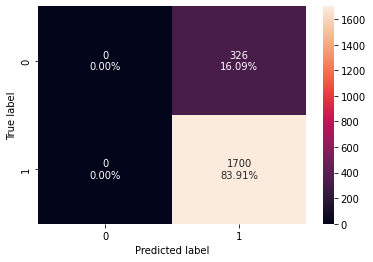

In [ ]:
#Draw Confusion Matrix
draw_matrix(rfc_tuned_gcv, X_val, y_val)

####RandomizedSearchCV

In [ ]:
#Calling RandomizedSearchCV
rfc_tuned2 = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid_rfc, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
rfc_tuned2.fit(X_train, y_train)

# Print best parameters
print("Best parameters are {} with CV score={}:" .format(rfc_tuned2.best_params_,rfc_tuned2.best_score_))

Best parameters are {'n_estimators': 100, 'min_samples_leaf': 5, 'max_samples': 0.3, 'max_features': 0.9, 'max_depth': 1} with CV score=1.0:


In [ ]:
#Building model with best parameters
rfc_tuned_rcv = RandomForestClassifier(
    random_state=1,
    max_features=0.9,
    max_samples=0.3,
    min_samples_leaf=5, 
    n_estimators=100,
    max_depth=1,
)

#Fit the model on training data
rfc_tuned_rcv.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, max_features=0.9, max_samples=0.3,
                       min_samples_leaf=5, random_state=1)

In [ ]:
#Calculating different metrics
rfc_tuned_rcv_score, rfc_tuned_rcv_list = get_metrics_score(
    rfc_tuned_rcv, False
)

#Model performance
rfc_tuned_rcv_score

,DataSet,Accuracy,Recall,Precision,F1
0,Training,0.839342,1.0,0.839342,0.912654
1,Validation,0.839092,1.0,0.839092,0.912507
2,Testing,0.839585,1.0,0.839585,0.912798


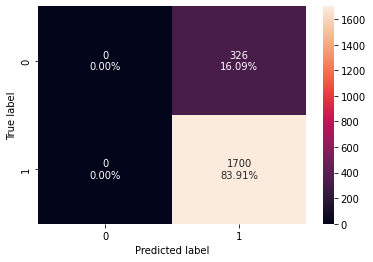

In [ ]:
#Draw Confusion Matrix
draw_matrix(rfc_tuned_rcv, X_val, y_val)

##XGBoost

###GridSearchCV

In [ ]:
#Defining model
xgb = XGBClassifier(random_state=1,eval_metric="logloss")

#Parameter grid
param_grid_xgb ={"n_estimators":np.arange(50,150,50),
            "scale_pos_weight":[2,5,10],
            "learning_rate":[0.01,0.1,0.2,0.05],
            "gamma":[0,1,3,5],
            "subsample":[0.8,0.9,1],
            "max_depth":np.arange(1,5,1),
            "reg_lambda":[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [ ]:
#Calling GridSearchCV - this takes *forever*
xgb_tuned1 = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
xgb_tuned1.fit(X_train,y_train)

#Print best parameters
print("Best parameters are {} with CV score={}:" .format(xgb_tuned1.best_params_,xgb_tuned1.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.8} with CV score=1.0:


In [ ]:
#Building model with best parameters
xgb_tuned_gcv = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=2,
    subsample=0.8,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)

#Fit the model on training data
xgb_tuned_gcv.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
xgb_tuned_gcv_score, xgb_tuned_gcv_list = get_metrics_score(
    xgb_tuned_gcv, False
)

#Model performance
xgb_tuned_gcv_score

In [ ]:
#Draw confusion matrix
draw_matrix(xgb_tuned_gcv, X_val, y_val)

###RandomizedSearchCV

In [ ]:
#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters
xgb_tuned2.fit(X_train,y_train)

#Print best parameters
print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

In [ ]:
#Building model with best parameters
xgb_tuned_rcv = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=2,
    subsample=0.8,
    learning_rate=0.01,
    gamma=5,
    eval_metric="logloss",
    reg_lambda=10,
    max_depth=1,
)

#Fit the model on training data
xgb_tuned_rcv.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
xgb_tuned_rcv_score, xgb_tuned_rcv_list = get_metrics_score(
    xgb_tuned_rcv, False
)

#Model performance
xgb_tuned_rcv_score

In [ ]:
#Draw confusion matrix
draw_matrix(xgb_tuned_rcv, X_val, y_val)

##GradientBoost

###GridSearchCV

In [ ]:
#Choose the type of classifier. 
gbc = GradientBoostingClassifier(random_state=1)

#Parameter grid
param_grid_gbc ={"n_estimators":np.arange(50,150,50),
            "learning_rate":[0.01,0.1,0.2,0.05],
            "subsample":[0.8,0.9,1],
            "max_depth":np.arange(1,5,1),
            "min_samples_leaf": np.arange(1,6,1),
            "max_features":["log2",0.7,0.9,"auto"],
            "max_depth":np.arange(1,5,1)}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [ ]:
#Run the grid search
gbc_tuned1 = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fit the model
gbc_tuned1.fit(X_train, y_train)

#Print best parameters
print("Best parameters are {} with CV score={}:" .format(gbc_tuned1.best_params_,gbc_tuned1.best_score_))

In [ ]:
#Choose the type of classifier
gbc_tuned_gcv = GradientBoostingClassifier (
                    random_state=1,
                    n_estimators=50,
                    learning_rate=0.01,
                    subsample=0.8,
                    max_depth=1,
                    min_samples_leaf=1,
                    max_features="log2",
)

# Fit the model on training data
gbc_tuned_gcv.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
gbc_tuned_gcv_score, gbc_tuned_gcv_list = get_metrics_score(
    gbc_tuned_gcv, False
)

#Model performance
gbc_tuned_gcv_score

In [ ]:
#Draw confusion matrix
draw_matrix(gbc_tuned_gcv, X_val, y_val)

###RandomizedSearchCV

In [ ]:
#Calling RandomizedSearchCV
gbc_tuned2 = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_gbc, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters
gbc_tuned2.fit(X_train,y_train)

#Print best parameters
print("Best parameters are {} with CV score={}:" .format(gbc_tuned2.best_params_,gbc_tuned2.best_score_))

In [ ]:
#Choose the type of classifier. 
gbc_tuned_rcv = GradientBoostingClassifier (
                    random_state=1,
                    n_estimators=50,
                    learning_rate=0.01,
                    subsample=0.8,
                    max_depth=1,
                    min_samples_leaf=4,
                    max_features=0.7,
)

#Fit the model on training data
gbc_tuned_rcv.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
gbc_tuned_rcv_score, gbc_tuned_rcv_list = get_metrics_score(
    gbc_tuned_rcv, False
)

#Model performance
gbc_tuned_rcv_score

In [ ]:
#Draw confusion matrix
draw_matrix(gbc_tuned_rcv, X_val, y_val)

##Compare Performance

In [ ]:
comparison_frame1 = pd.DataFrame({"Model":["Accuracy - Training",
                                        "Accuracy - Validation",
                                        "Accuracy - Test",
                                        "Recall - Training",
                                        "Recall - Validation",
                                        "Recall - Test",
                                        "Precision - Training",
                                        "Precision - Validation",
                                        "Precision - Test",
                                        "F1 - Training",
                                        "F1 - Validation",
                                        "F1 - Test"], 
                                        "Random Forest - Grid Search": rfc_tuned_gcv_list,
                                        "Random Forest - Randomized Search": rfc_tuned_rcv_list,
                                        "XG Boost - Grid Search": xgb_tuned_gcv_list,
                                        "XG Boost - Randomized Search": xgb_tuned_rcv_list,
                                        "Gradient Boost - Grid Search": gbc_tuned_gcv_list,
                                        "Gradient Boost - Randomized Search": gbc_tuned_rcv_list}
                                ) 
                                         
comparison_frame1

In [ ]:
feature_names = X.columns
importances = xgb_tuned_rcv.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#Productionize the model

In [ ]:
#Create  list of numerical variables
numerical_features = [
    "CLIENTNUM",
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

#Create transformer for numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

#Create list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

#Create transformer for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

#Combine categorical transformer and numerical transformer using column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

In [ ]:
#Separate target variable and other variables
X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

In [ ]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

In [ ]:
#Create new pipeline with best parameters
model = Pipeline(
    steps=[
        ("PRE", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=100,
                scale_pos_weight=2,
                subsample=0.8,
                learning_rate=0.01,
                gamma=5,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
            ),
        ),
    ]
)

# Fit the model on training data
model.fit(X_train, y_train)

In [ ]:
model.predict(X_test)

#Actionable Insights & Recommendations

Promotional campaigns should be developed to target:

*   Any cards not in use in the past quarter
*   Any platinum or high income card holders
*   Females or doctorate holders